In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# store dataset to python
# note: put the intended dataname within "". If it is within the same file just the name. Otherwise inventory
df = pd.read_csv("thesis data.csv", encoding ='utf-8')

In [3]:
df
df_new=df

In [4]:
#print(df)

In [4]:
#Choosing only datas of metonymy
df_new=df_new[df_new['strategy']=='Metonymy']
# df_new
# Separating target lines & rename
# reference(Line 6): https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

df_new=df_new[['concept','Type','frame']]



In [5]:
# rename: https://blog.csdn.net/chang995196962/article/details/97926062
# definition(rename): https://www.geeksforgeeks.org/python-pandas-dataframe-rename/
df_new.rename(columns={'concept':'概念','Type':'類型','frame':'數量'},inplace=True)

In [6]:
#clean NaN
df_new=df_new.dropna()
#df_new

In [7]:
# Grouping based on conceptual types
# 詞彙分析可能還是用一個個單獨輸入的比較好，因為如果最後再一個個畫
list_age = ['童年','少年','青年','中年','老年'] #making lists according to different types of words
list_sen = ['美味','甜味','苦味','香味','臭味']
list_deli =['人生','生命','死亡','快樂','追求']


list_title = ['年齡詞','嗅味覺','生與死']
list_all = [list_age, list_sen, list_deli]


#list_all[2][4]

In [8]:
# Here are the codes to use display Chinese on Python
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

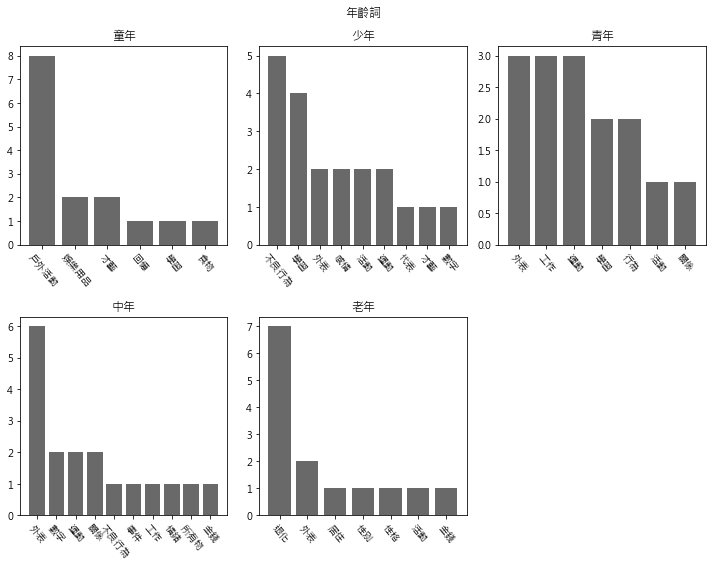

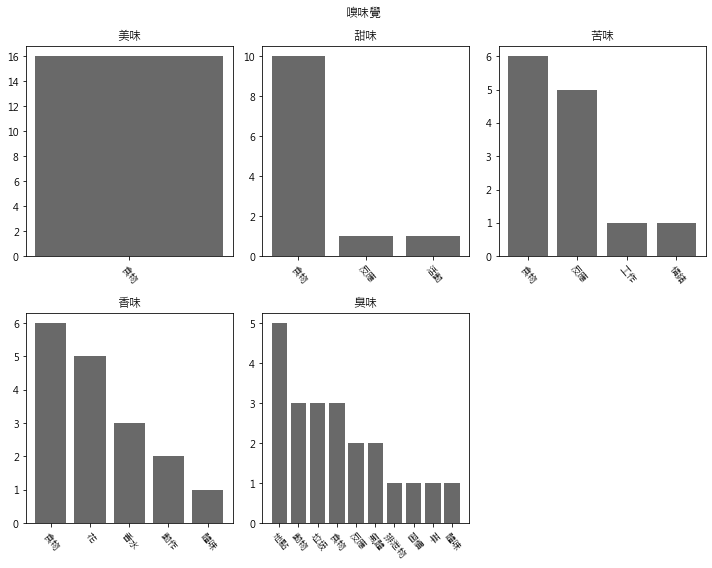

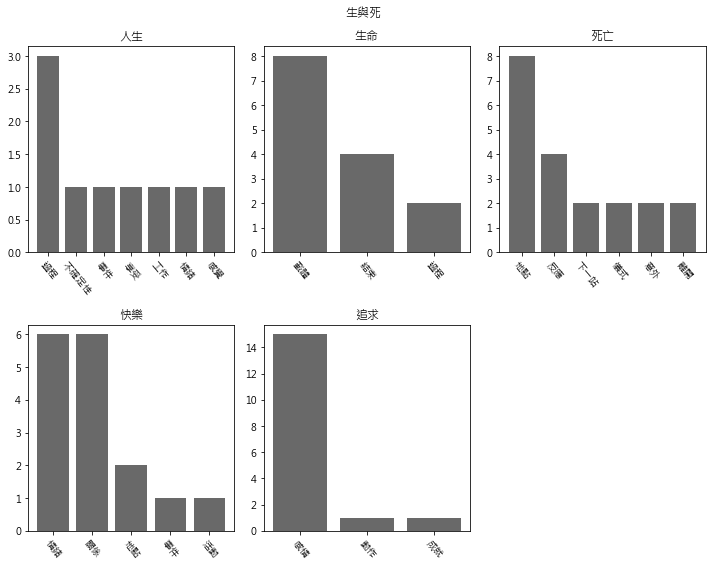

In [23]:

for k in range(len(list_all)):
    
    fig = plt.figure(figsize=(10,8))

    plt.suptitle(t=list_title[k],x=0.51)
  
   
    for i in range(len(list_all[k])):

    # Take out only one word
        df_agg = df_new[df_new['概念']==list_all[k][i]] # take only one
        df_agg = df_agg.groupby(['概念','類型']).count() # count number for each term
        df_pic=df_agg.sort_values(by='數量', ascending=False) #set order from the largest amount to the smallest amount
        #用這個函數來排序 df.sort_values(by='數量', ascending=True)
        #https://stackoverflow.com/questions/70339417/how-to-order-values-a-dataframe-from-high-to-low-in-python
        
        df_pic = pd.DataFrame(df_pic.to_records()) #convert pivot table back to dataframe


        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        fig.add_subplot(2, 3, i+1) #separate canvas
    

    #***https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py 複雜版
    #https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 簡易
    #pv_pic.plot.bar(x='類型',y='數量') 不是用於matplotlib
        plt.bar(df_pic['類型'],df_pic['數量'],color="dimgrey")
        plt.xticks(rotation=-50) #x軸斜體
        plt.title(list_all[k][i])

    # bar graph 參數 1. https://iter01.com/569325.html 2. https://steam.oxxostudio.tw/category/python/example/matplotlib-bar.html

    fig.tight_layout() # Creating suitable spacing
    
    fig.savefig('category_'+ list_title[k] + '.jpg') # export data seperately as jpg; https://www.youtube.com/watch?v=qpVhubsBcdk 
    
#spacing between figures; refer to https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

plt.show()

In [10]:
# Grouping based on distributional types

list1 = ['童年','中年','老年','美味','甜味','苦味','快樂','追求']
list2 = ['少年','臭味','青年']
list3 = ['生命','死亡']
list4 = ['香味','人生']
list_title_2 =['單邊強勢型','梯形','冪次型','遞減與弱單邊']
list_all_2 = [list1, list2, list3,list4]

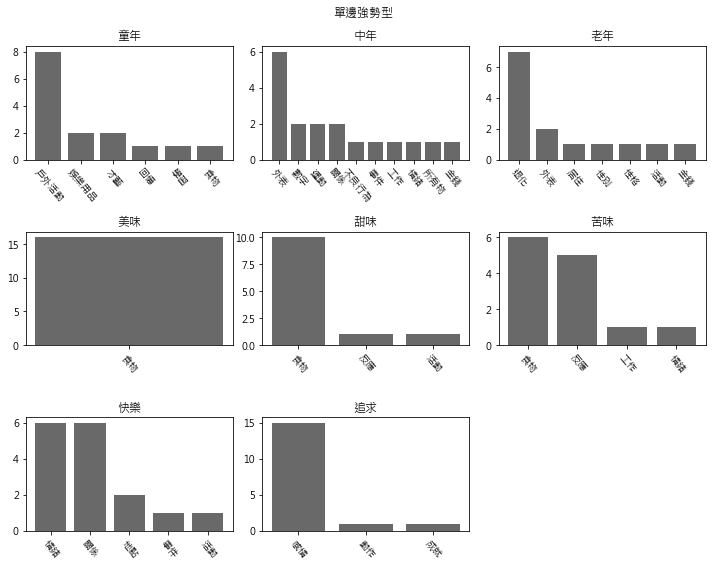

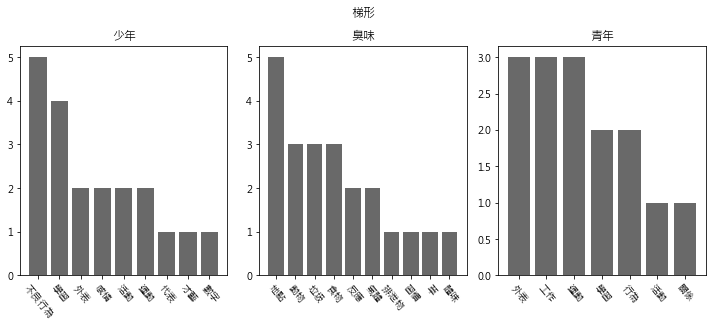

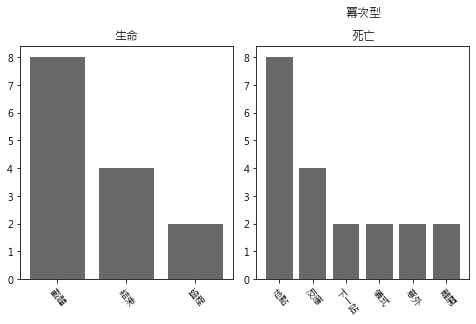

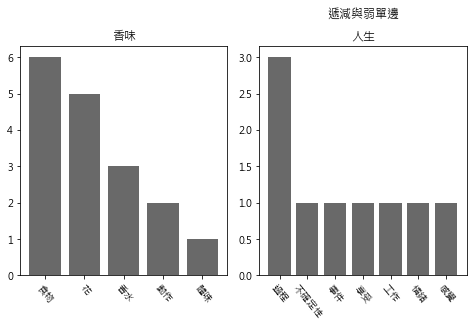

In [22]:

for k in range(len(list_all_2)):
    
    fig = plt.figure(figsize=(10,8))

    plt.suptitle(t=list_title_2[k],x=0.51)
  
# For condition of more than 2 lines in display
    if len(list_all_2[k]) > 6:
        for i in range(len(list_all_2[k])):

        # Take out only one word
            df_agg = df_new[df_new['概念']==list_all_2[k][i]] # take only one
            df_agg = df_agg.groupby(['概念','類型']).count() # count number for each term
            df_pic=df_agg.sort_values(by='數量', ascending=False) #set order from the largest amount to the smallest amount
        #用這個函數來排序 df.sort_values(by='數量', ascending=True)
        #https://stackoverflow.com/questions/70339417/how-to-order-values-a-dataframe-from-high-to-low-in-python
        
            df_pic = pd.DataFrame(df_pic.to_records()) #convert pivot table back to dataframe


            fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
            fig.add_subplot(len(list_all_2[k])//3+1, 3, i+1) #separate canvas
    

    #***https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py 複雜版
    #https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 簡易
    #pv_pic.plot.bar(x='類型',y='數量') 不是用於matplotlib
    # bar graph 參數 1. https://iter01.com/569325.html 2. https://steam.oxxostudio.tw/category/python/example/matplotlib-bar.html

            plt.bar(df_pic['類型'],df_pic['數量'],color="dimgrey")
            plt.xticks(rotation=-50) #x軸斜體
            plt.title(list_all_2[k][i])
            df_pic = pd.DataFrame(df_pic.to_records())

        fig.tight_layout() # Creating suitable spacing
    #spacing between figures; refer to https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
        fig.savefig('category_'+ list_title_2[k] + '.jpg') # export data seperately as jpg; https://www.youtube.com/watch?v=qpVhubsBcdk 
        
# For condition of 1&2 lines
    else:
        for i in range(len(list_all_2[k])):
            df_agg = df_new[df_new['概念']==list_all_2[k][i]] 
            df_agg = df_agg.groupby(['概念','類型']).count() 
            df_pic=df_agg.sort_values(by='數量', ascending=False)
            df_pic = pd.DataFrame(df_pic.to_records())


            fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
            fig.add_subplot(2, 3, i+1)
            plt.bar(df_pic['類型'],df_pic['數量'],color="dimgrey")
            plt.xticks(rotation=-50)
            plt.title(list_all_2[k][i])
            df_pic = pd.DataFrame(df_pic.to_records())   
        
        fig.tight_layout()
        fig.savefig('category_'+ list_title_2[k] + '.jpg')
plt.show()

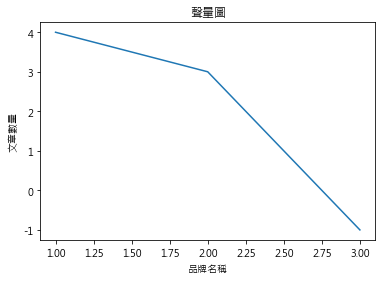

In [19]:
ax
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

,概念,類型,數量
0,童年,戶外活動,8
1,童年,娛樂用品,2
2,童年,學習,2
3,童年,才藝,2
4,童年,回憶,1
5,童年,食物,1


In [58]:
#Try to calculate each term
pv_agg=df_new.groupby(['概念','類型']).count()

pv_agg
#已經分出來了，下一步就是由多排到少(只能一個一個詞的分了)
#之後可以用這個函數來排序 df.sort_values(by='數量', ascending=True)
#https://stackoverflow.com/questions/70339417/how-to-order-values-a-dataframe-from-high-to-low-in-python

數量
概念 類型      
中年 不良行為   1
   事件     1
   外表     6
   工作     1
   情緒     1
...      ..
香味 動作     2
   花      5
   食物     6
   香水     3
   體味     1

[100 rows x 1 columns]

In [18]:
print ('Happy ' + repr(1))

Happy 1


In [27]:
2//3

0